In [68]:
import numpy as np
import glob
import os
%matplotlib inline
from readTRC import readTrc
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.patches as mpatches

In [69]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def FIND_MIN(X,Y):
    TriggerTime = find_nearest(X,0)
    Trigger     = np.where(X==TriggerTime)[0][0]+20
    xx = moving_average(X,20)
    yy = moving_average(Y,20)
    
    xxx = xx[Trigger:]
    yyy = yy[Trigger:]
    
    miny = min(yyy)
    
    hold      = find_nearest(yyy,miny)
    MINLOC     = np.where(yyy==hold)[0][0]
    
    TT = Trigger+MINLOC
    xxxx = xx[Trigger:TT]
    yyyy = yy[Trigger:TT]
    
    hold      = find_nearest(yyyy,miny*0.1)
    REDGE     = np.where(yyyy==hold)[0][0]
    return MINLOC+Trigger,miny,REDGE+Trigger

def FIND_MAX(X,Y):
    TriggerTime = find_nearest(X,0)
    Trigger     = np.where(X==TriggerTime)[0][0]+5
    xx = moving_average(X,20)
    yy = moving_average(Y,20)
    
    xxx = xx[Trigger:]
    yyy = yy[Trigger:]
    
    maxy = max(yyy)
    
    hold      = find_nearest(yyy,maxy)
    peak     = np.where(yyy==hold)[0][0]

    xxx = xx[Trigger:Trigger+peak]
    yyy = yy[Trigger:Trigger+peak]
    
    hold      = find_nearest(yyy,maxy*0.1)
    edge     = np.where(yyy==hold)[0][0]
    return Trigger+peak, Trigger+edge

In [70]:
cd /Users/austinmcdonald/Desktop/Xenon/Data/

/Users/austinmcdonald/Desktop/Xenon/Data


In [73]:
PATH = '/Users/austinmcdonald/Desktop/Xenon/Data/'
folders = glob.glob(PATH+"*/")
folders.sort()
folders

['/Users/austinmcdonald/Desktop/Xenon/Data/000/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/003/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/035/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/050/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/065/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/085/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/095/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/099/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/100/']

In [83]:
F=0
NAME = folders[F].split('/')[-2]
files = os.listdir(folders[F])
EP = []
Vd = []

for x in range(0,len(files)):
    name = files[x].split(".")[0]
    broken = name.split('_')
    percent  = int(broken[0].split('-')[1])
    tt = broken[1].split('-')[1]
    a, b = tt[:2], tt[2:]
    P = a+'.'+b
    pressure = float(P)
    Efield   = int(broken[2].split('-')[1])
    EP.append(Efield/pressure)
  
    Data = np.loadtxt(folders[F]+files[x])
    pp,ee = FIND_MAX(Data[0],Data[1])
    MM, MIN, RE = FIND_MIN(Data[0],Data[2])
    
    T0 = ee + int((pp-ee)/2)
    T0 = Data[0][T0]
    T1 = RE + int((MM-RE)/2)
    T1 = Data[0][T1]
    DT = (T1-T0)
    Vd.append(13.8*1e-5/DT)

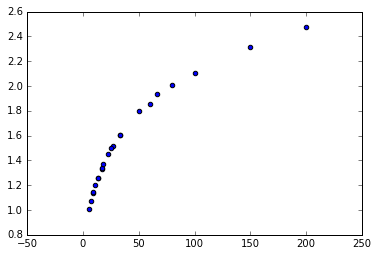

In [84]:
plt.scatter(EP,Vd)

In [156]:
perc = dict()
redu = dict()
drift= dict()
driftRR= dict()
reduRR = dict()
reduE = dict()

for y in range(0,len(folders)):
    F = y
    NAME = folders[F].split('/')[-2]
    files = os.listdir(folders[F])
    EP = []
    Vd = []
    DRR=[]
    P1  = []
    P3  = []
    P6  = []
    P9  = []
    P11 = []
    R1  = []
    R3  = []
    R6  = []
    R9  = []
    R11 = []
    E1  = []
    E3  = []
    E6  = []
    E9  = []
    E11 = []
    for x in range(0,len(files)):
        name = files[x].split(".")[0]
        broken = name.split('_')
        percent  = int(broken[0].split('-')[1])
        tt = broken[1].split('-')[1]
        a, b = tt[:2], tt[2:]
        P = a+'.'+b
        pressure = float(P)
        Efield   = int(broken[2].split('-')[1])
        ep = Efield/pressure
        EP.append(ep)

        Data = np.loadtxt(folders[F]+files[x])
        pp,ee = FIND_MAX(Data[0],Data[1])
        MM, MIN, RE = FIND_MIN(Data[0],Data[2])

        T0 = ee + int((pp-ee)/2)
        T0 = Data[0][T0]
        T1 = RE + int((MM-RE)/2)
        T1 = Data[0][T1]
        DT = (T1-T0) 
        vd = 13.8*1e-5/DT
        Vd.append(vd)
        
        PP = round(pressure)
        if PP==1:
            P1.append(vd)
            R1.append(ep)
            E1.append(Efield)
        if PP==3:
            P3.append(vd)
            R3.append(ep)
            E3.append(Efield)
        if PP==6:
            P6.append(vd)
            R6.append(ep)
            E6.append(Efield)
        if PP==9:
            P9.append(vd)
            R9.append(ep)
            E9.append(Efield)
        if PP==11:
            P11.append(vd)
            R11.append(ep)
            E11.append(Efield)
        #DRR.append(pressure)
    
    perc[y] = NAME
    redu[y] = EP
    drift[y] = Vd
    driftRR[y] = np.array([P1,P3,P6,P9,P11])
    reduRR[y]  = np.array([R1,R3,R6,R9,R11])
    reduE[y]  = np.array([E1,E3,E6,E9,E11])

In [103]:
driftRR[4]

array([ [2.2549019344333088, 1.9546741981206597, 1.7336683214487245, 1.8598382531983622, 2.1296296047425711],
       [1.6389548502056837, 1.4345114177475942, 1.5098468094892608, 1.7380352441727771],
       [1.1499999865609882, 1.2683823381187367, 1.2190812578385029, 1.0917721391401785],
       [0.7921928724874775, 1.0329341196655575, 0.98150781214309057, 0.59740259042129229],
       [0.92493296506245659, 0.44287547621090678, 0.25920360328196573, 0.7940161011928567]], dtype=object)

In [108]:
redu[4][1]

11.22334455667789

In [ ]:
legend1 = pyplot.legend([lines[i] for i in [0,1,2]], ["algo1", "algo2", "algo3"], loc=1)
legend2 = pyplot.legend([lines[i] for i in [0,3,6]], parameters, loc=4)
, color='blue', marker='*',markersize=15, label='Blue stars'

from collections import OrderedDict
import matplotlib.pyplot as plt

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

flat_list = [item for sublist in l for item in sublist]


In [166]:
r = mpatches.Patch(color='r',    label='0%Xe',alpha=0.6)
k = mpatches.Patch(color='k',    label='85%Xe',alpha=0.6)
p = mpatches.Patch(color='pink', label='100%Xe',alpha=0.6)
y = mpatches.Patch(color='y',    label='95%Xe',alpha=0.6)
m = mpatches.Patch(color='m',    label='65%Xe',alpha=0.6)

In [215]:
XX=np.array([  81.06666667,  101.33333333,  152.        ,  202.66666667,
        253.33333333,  304.        ,   27.02222222,   33.77777778,
         50.66666667,   67.55555556,   84.44444444,  101.33333333,
         13.51111111,   16.88888889,   25.33333333,   33.77777778,
         42.22222222,   50.66666667,    9.00740741,   11.25925926,
         16.88888889,   22.51851852,   28.14814815,   33.77777778,
          7.36969697,    9.21212121,   13.81818182,   18.42424242,
         23.03030303,   27.63636364])
YY=np.array([ 1.028 ,  1.08  ,  0.    ,  1.252 ,  1.308 ,  1.383 ,  0.822 ,
        0.8673,  0.9307,  0.    ,  1.037 ,  1.075 ,  0.6083,  0.6878,
        0.8201,  0.8673,  0.9115,  0.9307,  0.2309,  0.3908,  0.6878,
        0.7639,  0.843 ,  0.8674,  0.148 ,  0.    ,  0.5408,  0.6874,
        0.7749,  0.8392])

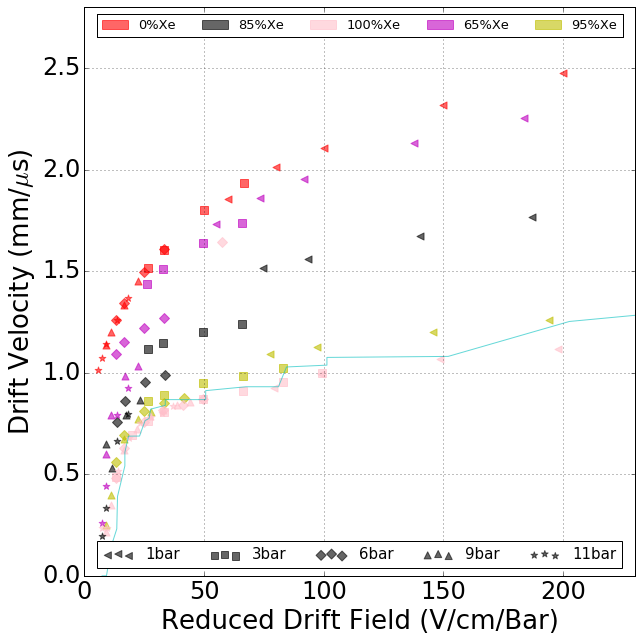

In [219]:
plt.figure(figsize=(9,9))
mark = ['<','s','D','^','*']
labb = ['1bar','3bar','6bar','9bar','11bar']
for x in range(0,5):
    plt.scatter(reduRR[4][x],driftRR[4][x],marker=mark[x],s=50,alpha=0.6,color='m',label=labb[x])
    plt.scatter(reduRR[0][x],driftRR[0][x],marker=mark[x],s=50,alpha=0.6,color='r',label=labb[x])
    plt.scatter(reduRR[6][x],driftRR[6][x],marker=mark[x],s=50,alpha=0.6,color='y',label=labb[x])
    plt.scatter(reduRR[8][x],driftRR[8][x],marker=mark[x],s=50,alpha=0.6,color='pink',label=labb[x])
    plt.scatter(reduRR[5][x],driftRR[5][x],marker=mark[x],s=50,alpha=0.6,color='k',label=labb[x])

    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower center',ncol=5,fontsize=15)

legend1=plt.legend(handles=[r,k,p,m,y],loc='upper center',ncol=5,fontsize=13)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.plot(sorted(XX),sorted(YY),alpha=0.6,color='c')

    
plt.xlim(0,230)
plt.ylim(0,2.8)
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.tight_layout()

#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.show()
   

In [187]:
perc

{0: '000',
 1: '003',
 2: '035',
 3: '050',
 4: '065',
 5: '085',
 6: '095',
 7: '099',
 8: '100'}

In [188]:
r = mpatches.Patch(color='r',    label='0%Xe',alpha=0.6)
k = mpatches.Patch(color='k',    label='85%Xe',alpha=0.6)
p = mpatches.Patch(color='pink', label='100%Xe',alpha=0.6)
y = mpatches.Patch(color='y',    label='95%Xe',alpha=0.6)
m = mpatches.Patch(color='m',    label='65%Xe',alpha=0.6)
g = mpatches.Patch(color='g',    label='35%Xe',alpha=0.6)
b = mpatches.Patch(color='b',    label='50%Xe',alpha=0.6)
c = mpatches.Patch(color='c',    label='99%Xe',alpha=0.6)

(array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <a list of 7 Text yticklabel objects>)

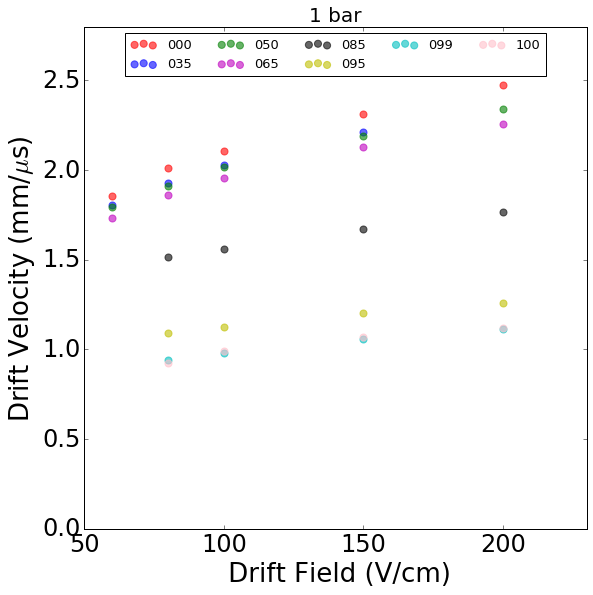

In [194]:
x=0
plt.figure(figsize=(9,9))
plt.scatter(reduE[0][x],driftRR[0][x],s=50,alpha=0.6,color='r',label=perc[0])
plt.scatter(reduE[2][x],driftRR[2][x],s=50,alpha=0.6,color='b',label=perc[2])
plt.scatter(reduE[3][x],driftRR[3][x],s=50,alpha=0.6,color='g',label=perc[3])
plt.scatter(reduE[4][x],driftRR[4][x],s=50,alpha=0.6,color='m',label=perc[4])
plt.scatter(reduE[5][x],driftRR[5][x],s=50,alpha=0.6,color='k',label=perc[5])
plt.scatter(reduE[6][x],driftRR[6][x],s=50,alpha=0.6,color='y',label=perc[6])
plt.scatter(reduE[7][x],driftRR[7][x],s=50,alpha=0.6,color='c',label=perc[7])
plt.scatter(reduE[8][x],driftRR[8][x],s=50,alpha=0.6,color='pink',label=perc[8])
plt.legend(loc='upper center',ncol=5,fontsize=13)
plt.title('1 bar',fontsize=20)

plt.xlim(50,230)
plt.ylim(0,2.8)
plt.xlabel(r' Drift Field (V/cm)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <a list of 7 Text yticklabel objects>)

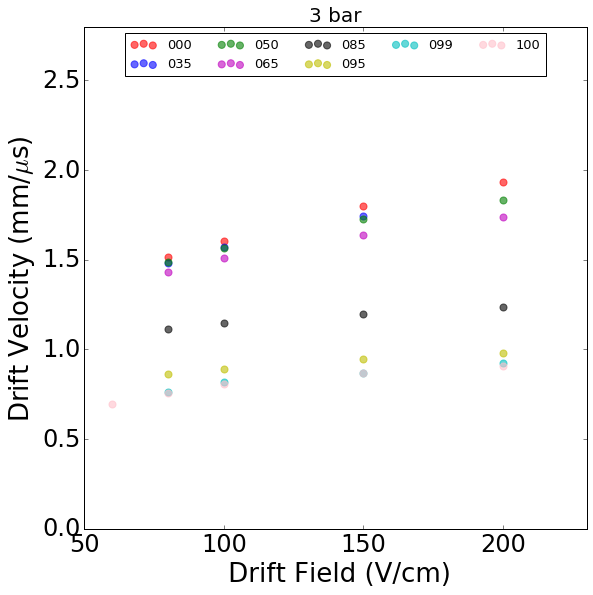

In [195]:
x=1
plt.figure(figsize=(9,9))
plt.scatter(reduE[0][x],driftRR[0][x],s=50,alpha=0.6,color='r',label=perc[0])
plt.scatter(reduE[2][x],driftRR[2][x],s=50,alpha=0.6,color='b',label=perc[2])
plt.scatter(reduE[3][x],driftRR[3][x],s=50,alpha=0.6,color='g',label=perc[3])
plt.scatter(reduE[4][x],driftRR[4][x],s=50,alpha=0.6,color='m',label=perc[4])
plt.scatter(reduE[5][x],driftRR[5][x],s=50,alpha=0.6,color='k',label=perc[5])
plt.scatter(reduE[6][x],driftRR[6][x],s=50,alpha=0.6,color='y',label=perc[6])
plt.scatter(reduE[7][x],driftRR[7][x],s=50,alpha=0.6,color='c',label=perc[7])
plt.scatter(reduE[8][x],driftRR[8][x],s=50,alpha=0.6,color='pink',label=perc[8])
plt.legend(loc='upper center',ncol=5,fontsize=13)
plt.title('3 bar',fontsize=20)

plt.xlim(50,230)
plt.ylim(0,2.8)
plt.xlabel(r' Drift Field (V/cm)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <a list of 7 Text yticklabel objects>)

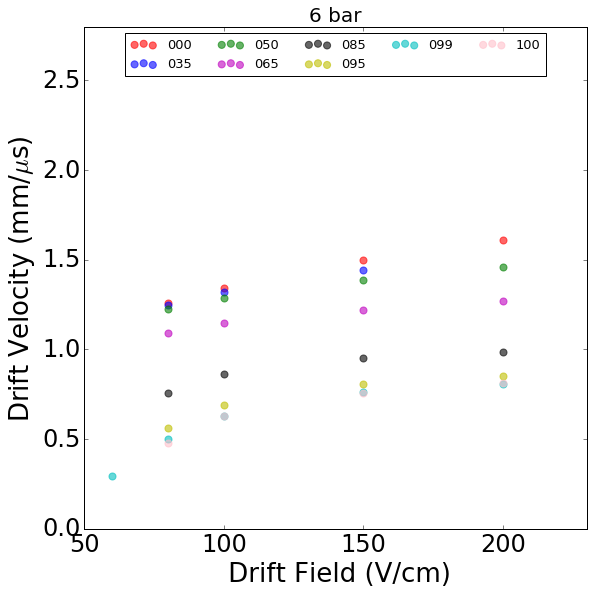

In [196]:
x=2
plt.figure(figsize=(9,9))
plt.scatter(reduE[0][x],driftRR[0][x],s=50,alpha=0.6,color='r',label=perc[0])
plt.scatter(reduE[2][x],driftRR[2][x],s=50,alpha=0.6,color='b',label=perc[2])
plt.scatter(reduE[3][x],driftRR[3][x],s=50,alpha=0.6,color='g',label=perc[3])
plt.scatter(reduE[4][x],driftRR[4][x],s=50,alpha=0.6,color='m',label=perc[4])
plt.scatter(reduE[5][x],driftRR[5][x],s=50,alpha=0.6,color='k',label=perc[5])
plt.scatter(reduE[6][x],driftRR[6][x],s=50,alpha=0.6,color='y',label=perc[6])
plt.scatter(reduE[7][x],driftRR[7][x],s=50,alpha=0.6,color='c',label=perc[7])
plt.scatter(reduE[8][x],driftRR[8][x],s=50,alpha=0.6,color='pink',label=perc[8])
plt.legend(loc='upper center',ncol=5,fontsize=13)
plt.title('6 bar',fontsize=20)

plt.xlim(50,230)
plt.ylim(0,2.8)
plt.xlabel(r' Drift Field (V/cm)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <a list of 7 Text yticklabel objects>)

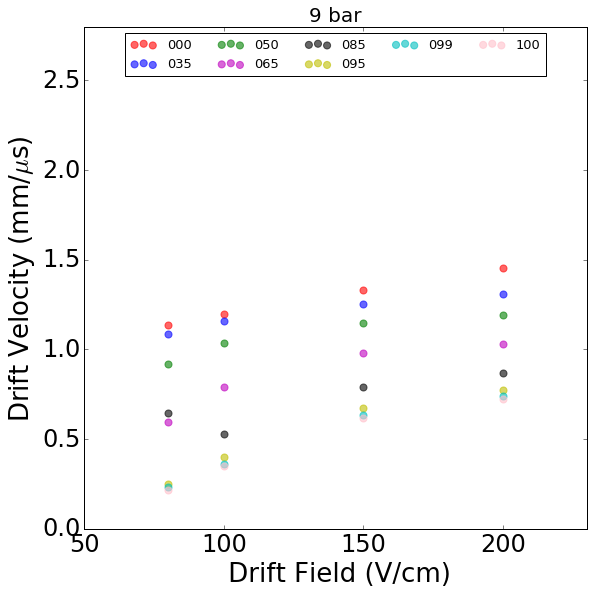

In [197]:
x=3
plt.figure(figsize=(9,9))

plt.scatter(reduE[0][x],driftRR[0][x],s=50,alpha=0.6,color='r',label=perc[0])
plt.scatter(reduE[2][x],driftRR[2][x],s=50,alpha=0.6,color='b',label=perc[2])
plt.scatter(reduE[3][x],driftRR[3][x],s=50,alpha=0.6,color='g',label=perc[3])
plt.scatter(reduE[4][x],driftRR[4][x],s=50,alpha=0.6,color='m',label=perc[4])
plt.scatter(reduE[5][x],driftRR[5][x],s=50,alpha=0.6,color='k',label=perc[5])
plt.scatter(reduE[6][x],driftRR[6][x],s=50,alpha=0.6,color='y',label=perc[6])
plt.scatter(reduE[7][x],driftRR[7][x],s=50,alpha=0.6,color='c',label=perc[7])
plt.scatter(reduE[8][x],driftRR[8][x],s=50,alpha=0.6,color='pink',label=perc[8])
plt.legend(loc='upper center',ncol=5,fontsize=13)
plt.title('9 bar',fontsize=20)

plt.xlim(50,230)
plt.ylim(0,2.8)
plt.xlabel(r' Drift Field (V/cm)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8]),
 <a list of 10 Text yticklabel objects>)

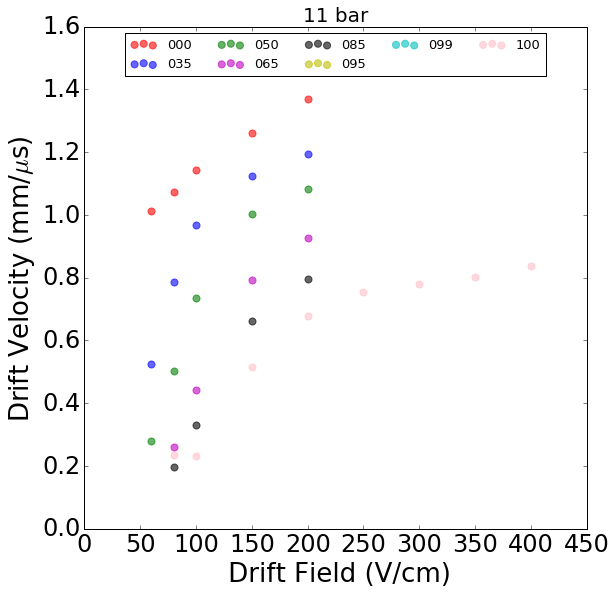

In [198]:
x=4
plt.figure(figsize=(9,9))
plt.scatter(reduE[0][x],driftRR[0][x],s=50,alpha=0.6,color='r',label=perc[0])
plt.scatter(reduE[2][x],driftRR[2][x],s=50,alpha=0.6,color='b',label=perc[2])
plt.scatter(reduE[3][x],driftRR[3][x],s=50,alpha=0.6,color='g',label=perc[3])
plt.scatter(reduE[4][x],driftRR[4][x],s=50,alpha=0.6,color='m',label=perc[4])
plt.scatter(reduE[5][x],driftRR[5][x],s=50,alpha=0.6,color='k',label=perc[5])
plt.scatter(reduE[6][x],driftRR[6][x],s=50,alpha=0.6,color='y',label=perc[6])
plt.scatter(reduE[7][x],driftRR[7][x],s=50,alpha=0.6,color='c',label=perc[7])
plt.scatter(reduE[8][x],driftRR[8][x],s=50,alpha=0.6,color='pink',label=perc[8])
plt.legend(loc='upper center',ncol=5,fontsize=13)

plt.title('11 bar',fontsize=20)
##plt.xlim(50,230)
#plt.ylim(0,2.8)
plt.xlabel(r' Drift Field (V/cm)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

In [199]:
perc[4]

'065'

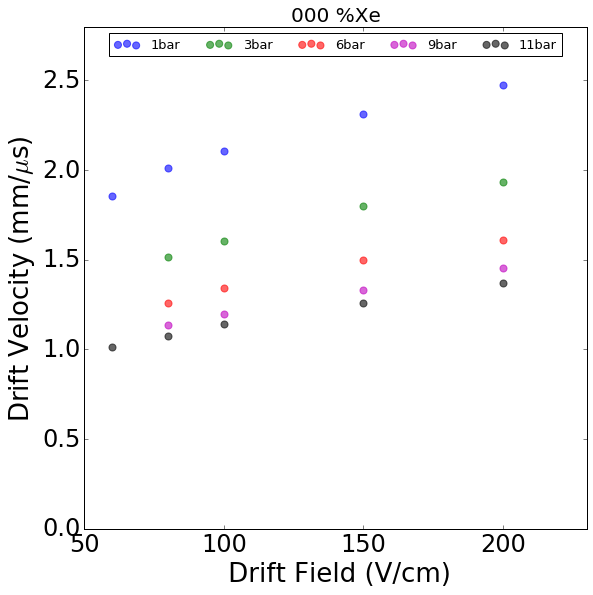

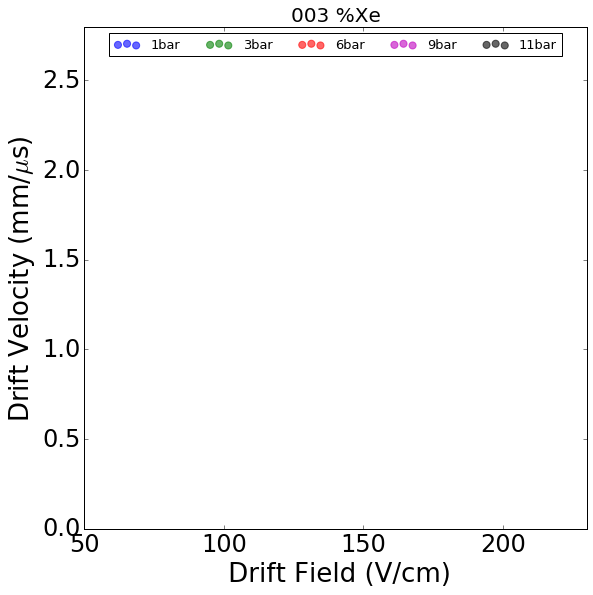

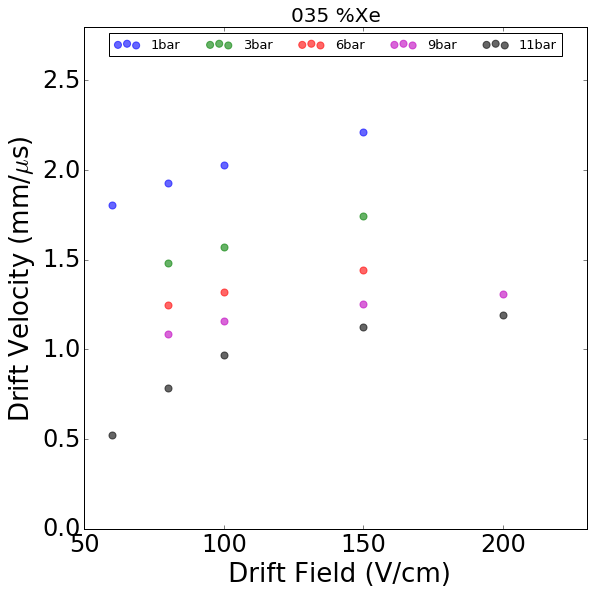

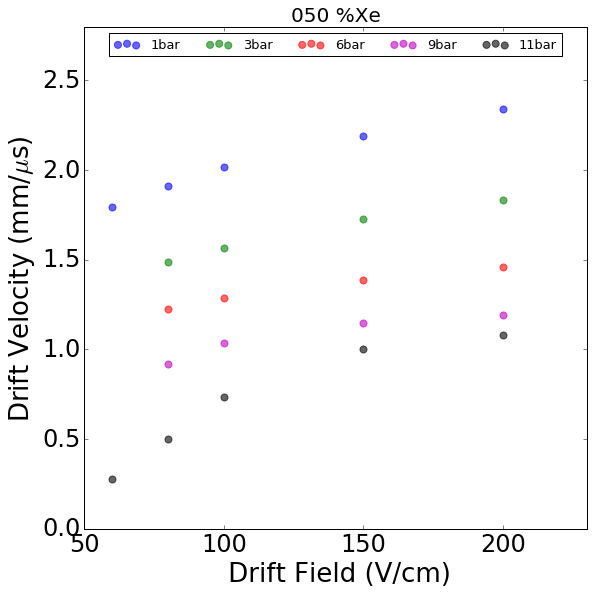

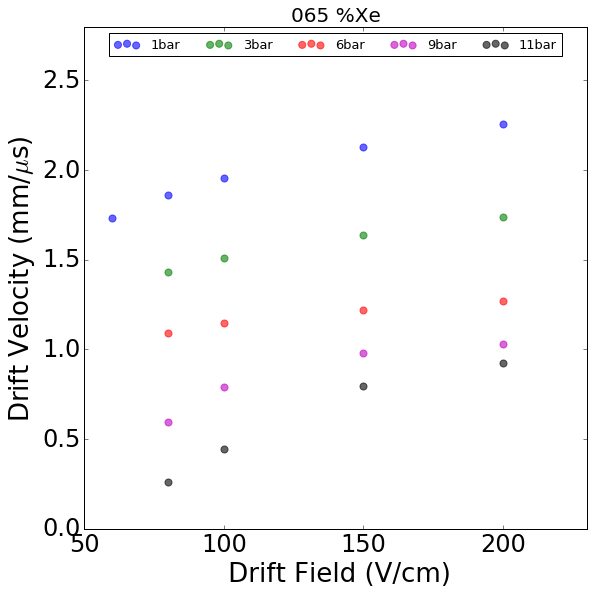

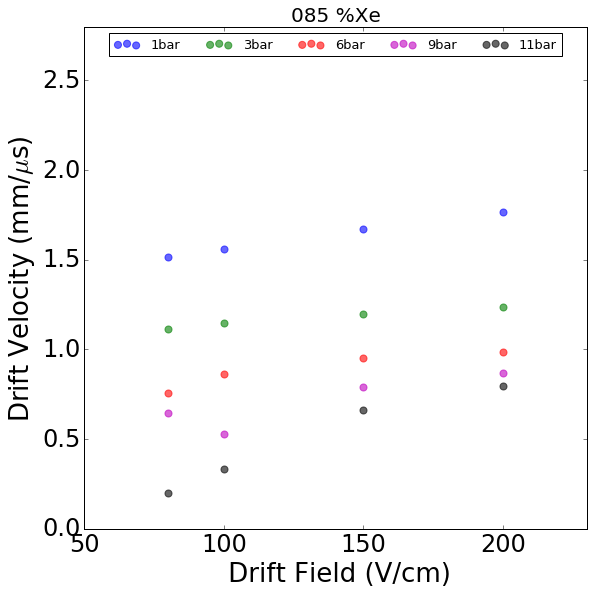

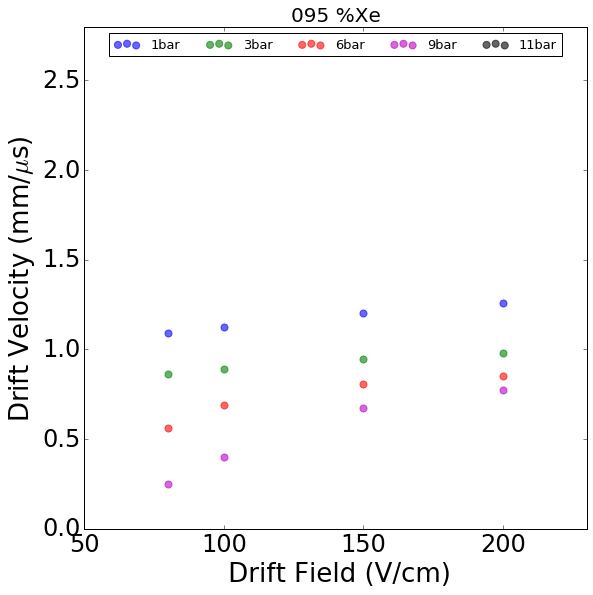

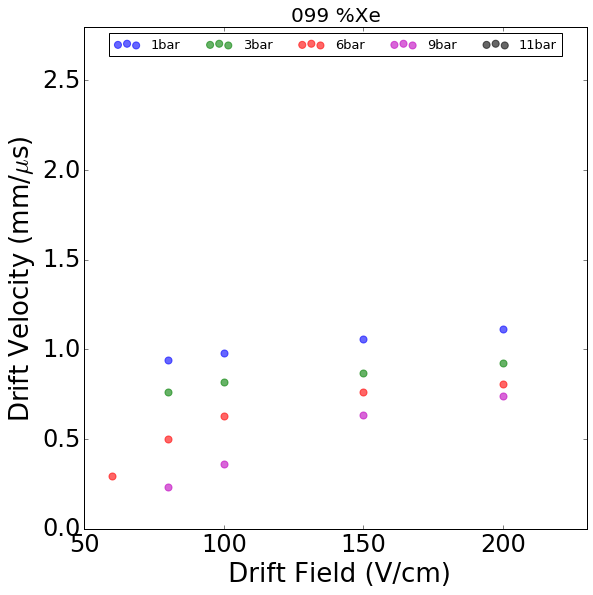

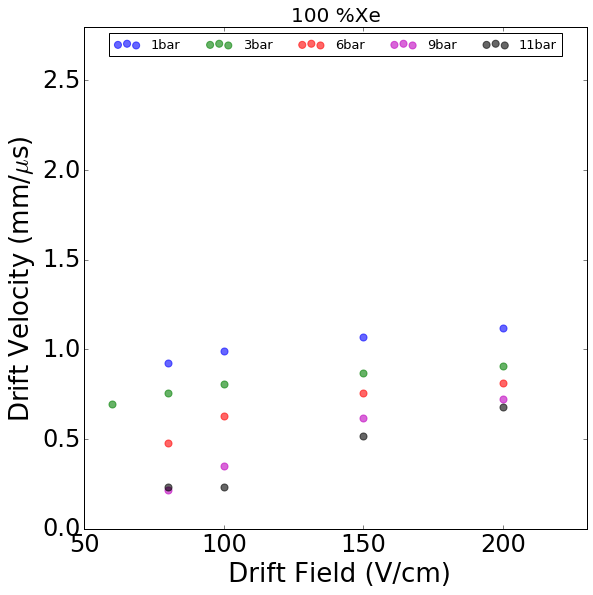

In [182]:
AH=0
for AH in range(0,len(reduE)):
    plt.figure(figsize=(9,9))
    col = ['b','g','r','m','k']
    for x in range(0,5):
        plt.scatter(reduE[AH][x],driftRR[AH][x],s=50,alpha=0.6,label=labb[x],color=col[x])
    TT = perc[AH]+' %Xe'
    plt.title(TT,fontsize=20)
    #legend1=plt.legend(handles=[r,k,p,m,y],loc='upper center',ncol=5,fontsize=13)
    plt.legend(loc='upper center',ncol=5,fontsize=13)
    plt.xlim(50,230)
    plt.ylim(0,2.8)
    plt.xlabel(r' Drift Field (V/cm)',fontsize=26)
    plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.show()

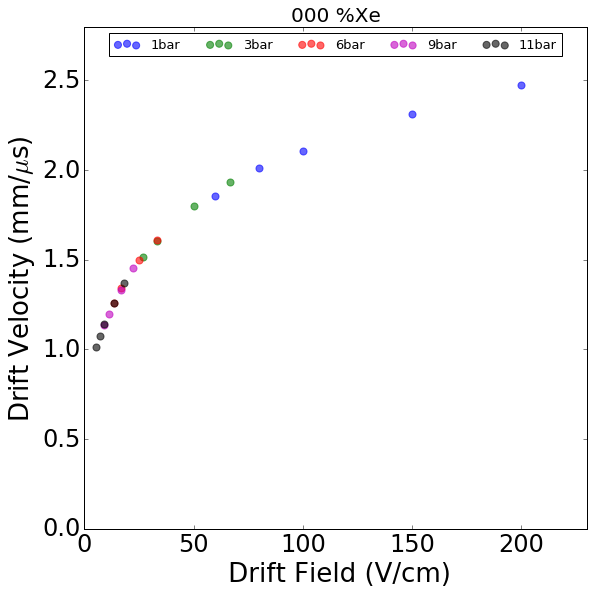

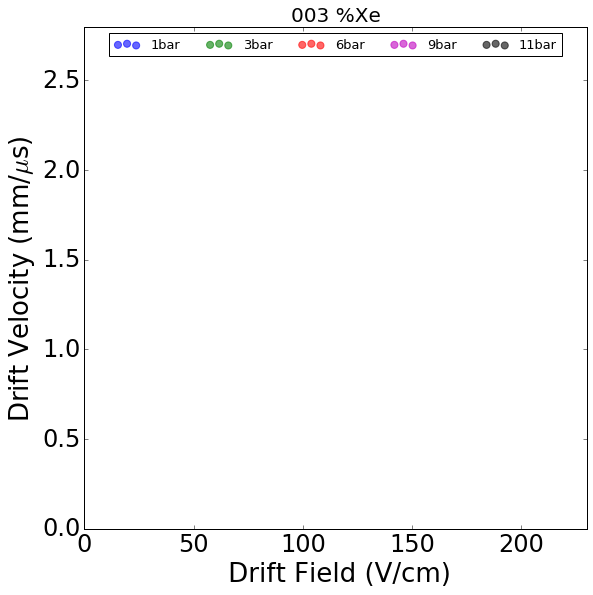

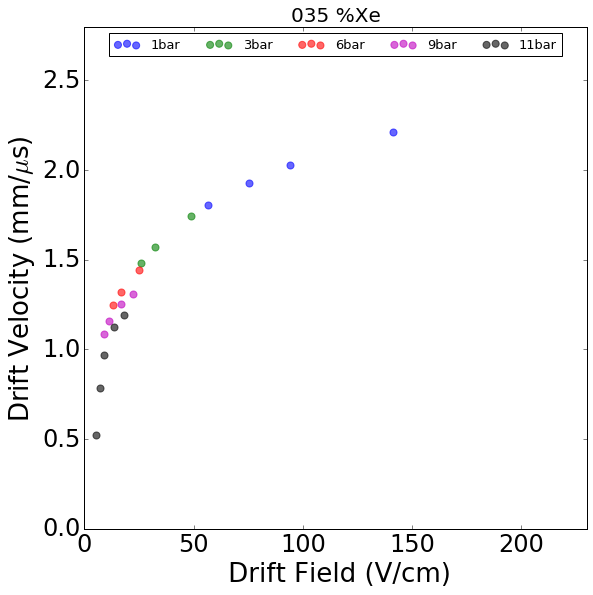

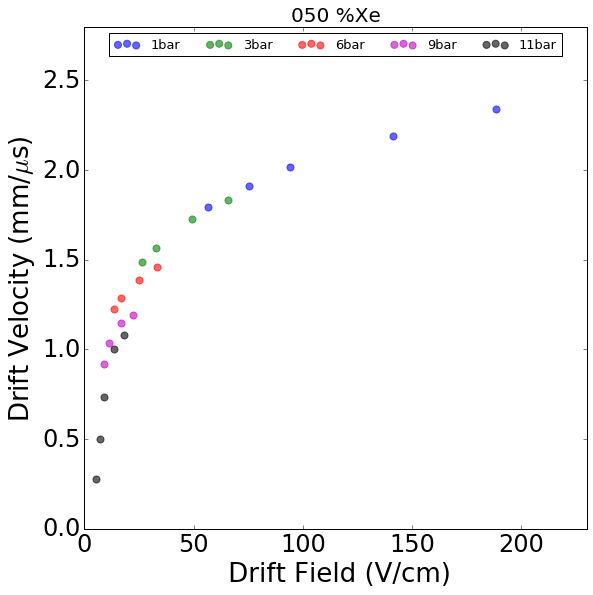

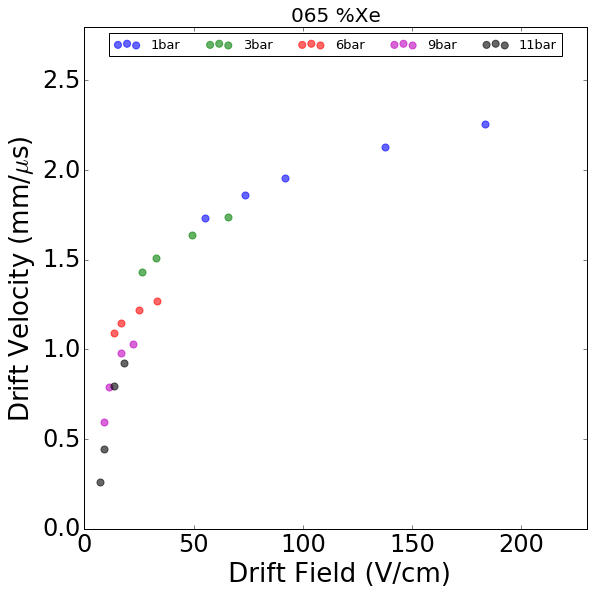

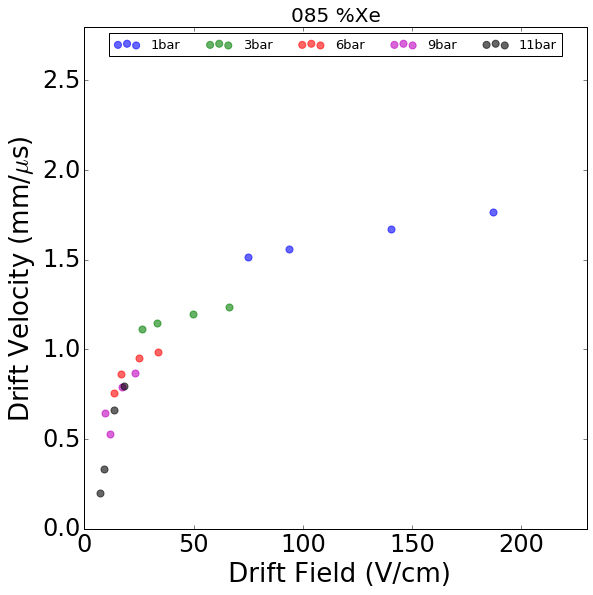

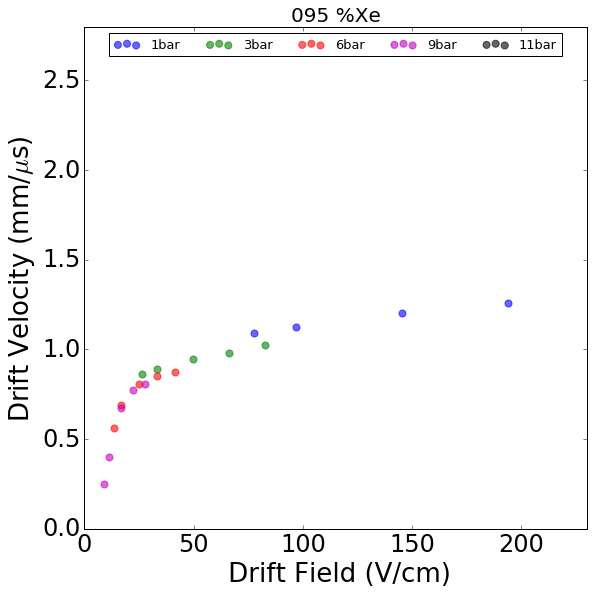

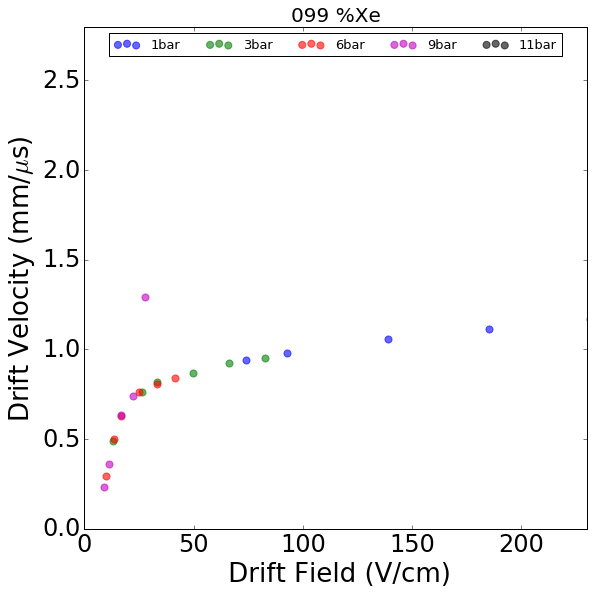

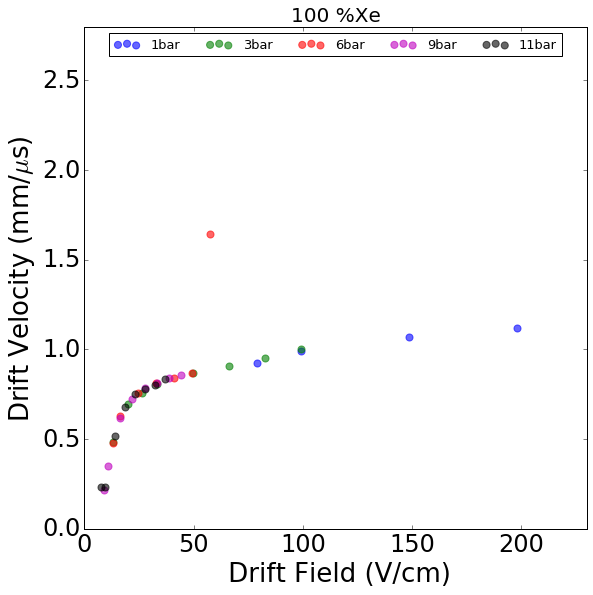

In [184]:
AH=0
for AH in range(0,len(reduE)):
    plt.figure(figsize=(9,9))
    col = ['b','g','r','m','k']
    for x in range(0,5):
        plt.scatter(reduRR[AH][x],driftRR[AH][x],s=50,alpha=0.6,label=labb[x],color=col[x])
    TT = perc[AH]+' %Xe'
    plt.title(TT,fontsize=20)
    #legend1=plt.legend(handles=[r,k,p,m,y],loc='upper center',ncol=5,fontsize=13)
    plt.legend(loc='upper center',ncol=5,fontsize=13)
    plt.xlim(0,230)
    plt.ylim(0,2.8)
    plt.xlabel(r' Drift Field (V/cm)',fontsize=26)
    plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.show()

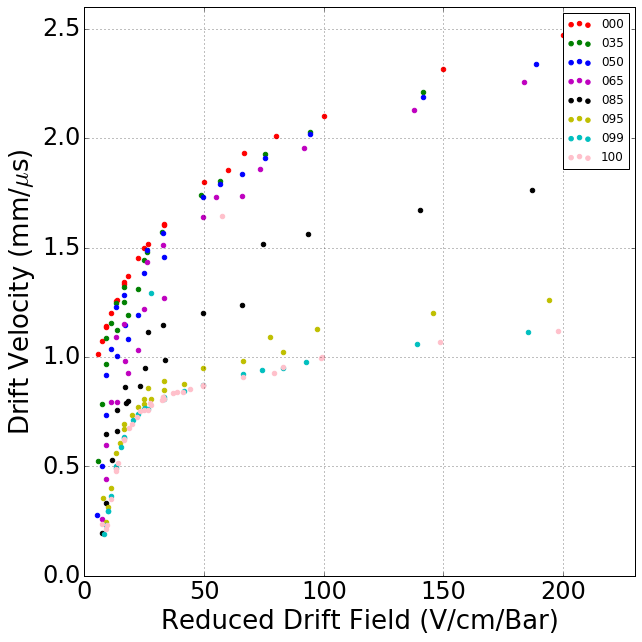

In [92]:
plt.figure(figsize=(9,9))
plt.scatter(redu[0],drift[0],label=perc[0],color='r')
plt.scatter(redu[2],drift[2],label=perc[2],color='g')
plt.scatter(redu[3],drift[3],label=perc[3],color='b')
plt.scatter(redu[4],drift[4],label=perc[4],color='m')
plt.scatter(redu[5],drift[5],label=perc[5],color='k')
plt.scatter(redu[6],drift[6],label=perc[6],color='y')
plt.scatter(redu[7],drift[7],label=perc[7],color='c')
plt.scatter(redu[8],drift[8],label=perc[8],color='pink')


plt.legend(loc="upper right")
plt.xlim(0,230)
plt.ylim(0,2.6)
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()

#plt.xticks(np.arange(0, 400, 50.0))
#plt.ylim(0,0.4)
plt.grid()
plt.show()
   

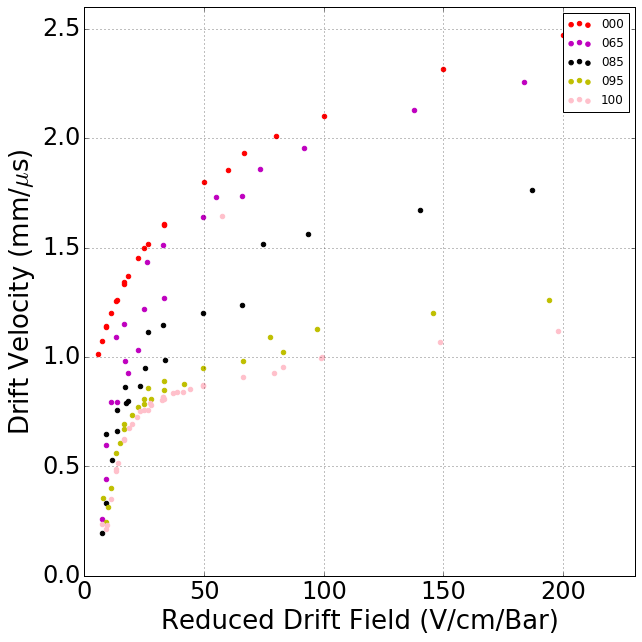

In [93]:
plt.figure(figsize=(9,9))
plt.scatter(redu[0],drift[0],label=perc[0],color='r')
#plt.scatter(redu[2],drift[2],label=perc[2],color='g')
#plt.scatter(redu[3],drift[3],label=perc[3],color='b')
plt.scatter(redu[4],drift[4],label=perc[4],color='m')
plt.scatter(redu[5],drift[5],label=perc[5],color='k')
plt.scatter(redu[6],drift[6],label=perc[6],color='y')
#plt.scatter(redu[7],drift[7],label=perc[7],color='c')
plt.scatter(redu[8],drift[8],label=perc[8],color='pink')


plt.legend(loc="upper right")
plt.xlim(0,230)
plt.ylim(0,2.6)
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()

#plt.xticks(np.arange(0, 400, 50.0))
#plt.ylim(0,0.4)
plt.grid()
plt.show()
   

In [ ]:
Tdrift=[]
for x in range(0,len(files)):
    Data = np.loadtxt(files[x])
    pp,ee = FIND_MAX(Data[0],Data[1])
    MM, MIN, RE = FIND_MIN(Data[0],Data[2])
    P = INFO[x][2]
    T0 = ee + int((pp-ee)/2)
    T0 = Data[0][T0]
    T1 = RE + int((MM-RE)/2)
    T1 = Data[0][T1]
    DT = (T1-T0)
    er = np.sqrt((0.1/13.8)**2+2*(0/DT)**2)
    Tdrift.append(13.8*1e-5/DT)
    Erry.append(er)
    er2 = np.sqrt((0.1/INFO[x][3])**2+(0.05/INFO[x][2])**2+(0.1/13.8)**2)
    Errx.append(er2)

In [18]:
files = os.listdir()
files.remove('.DS_Store')
files.sort()
#files

In [19]:
name = files[0].split(".")[0]
broken = name.split('_')
percent  = int(broken[0].split('-')[1])
tt = broken[1].split('-')[1]
a, b = tt[:2], tt[2:]
P = a+'.'+b
pressure = float(P)
Efield   = int(broken[2].split('-')[1])

In [6]:
broken[1].split('-')[1]

'01'

In [7]:
tt = broken[1].split('-')[1]
a, b = tt[:2], tt[2:]
P = a+'.'+b
float(P)

1.0

In [8]:
name

'Xe-000_P-01_E-060'

In [56]:
INFO = []
for q in range(0,len(files)):    
    name = files[q].split(".")[0]
    broken = name.split('_')
    percent  = int(broken[0].split('-')[1])
    tt = broken[1].split('-')[1]
    a, b = tt[:2], tt[2:]
    P = a+'.'+b
    pressure = float(P)
    Efield   = int(broken[2].split('-')[1])
    II = [name, float(percent), float(pressure), float(Efield)]
    INFO.append(II)
INFO = np.array(INFO)

In [32]:
def FIND_MIN(X,Y):
    TriggerTime = find_nearest(X,0)
    Trigger     = np.where(X==TriggerTime)[0][0]+20
    xx = moving_average(X,20)
    yy = moving_average(Y,20)
    
    xxx = xx[Trigger:]
    yyy = yy[Trigger:]
    
    miny = min(yyy)
    
    hold      = find_nearest(yyy,miny)
    MINLOC     = np.where(yyy==hold)[0][0]
    
    TT = Trigger+MINLOC
    xxxx = xx[Trigger:TT]
    yyyy = yy[Trigger:TT]
    
    hold      = find_nearest(yyyy,miny*0.1)
    REDGE     = np.where(yyyy==hold)[0][0]
    return MINLOC+Trigger,miny,REDGE+Trigger

In [33]:
def FIND_MAX(X,Y):
    TriggerTime = find_nearest(X,0)
    Trigger     = np.where(X==TriggerTime)[0][0]+5
    xx = moving_average(X,20)
    yy = moving_average(Y,20)
    
    xxx = xx[Trigger:]
    yyy = yy[Trigger:]
    
    maxy = max(yyy)
    
    hold      = find_nearest(yyy,maxy)
    peak     = np.where(yyy==hold)[0][0]

    xxx = xx[Trigger:Trigger+peak]
    yyy = yy[Trigger:Trigger+peak]
    
    hold      = find_nearest(yyy,maxy*0.1)
    edge     = np.where(yyy==hold)[0][0]
    return Trigger+peak, Trigger+edge

In [12]:
files[65]

'Xe-050_P-0304_E-150.txt'

In [13]:
Data = np.loadtxt(files[65])

7.9800000932550656e-05

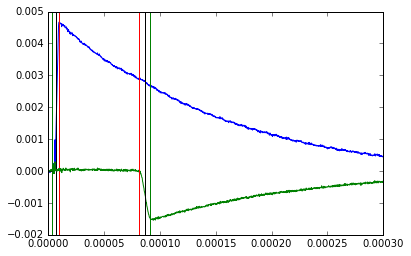

In [14]:
plt.plot(Data[0],Data[1])
pp,ee = FIND_MAX(Data[0],Data[1])
plt.axvline(Data[0][pp],color='r')
plt.axvline(Data[0][ee],color='g')
I = ee + int((pp-ee)/2)
plt.axvline(Data[0][I],color='k')

plt.plot(Data[0],Data[2])
MM, MIN, RE = FIND_MIN(Data[0],Data[2])
plt.axvline(Data[0][RE],color='r')
plt.axvline(Data[0][MM],color='g')
I2 = RE + int((MM-RE)/2)
plt.axvline(Data[0][I2],color='k')

plt.xlim(0,0.0003)

Data[0][I2]-Data[0][I]

In [26]:
#    II = [name, percent, pressure, Efield]
#    INFO.append(II)
files[22]

'Xe-003_P-01_E-080.txt'

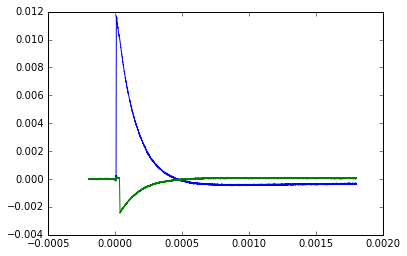

In [31]:
Data = np.loadtxt(files[22])
plt.plot(Data[0],Data[1])
plt.plot(Data[0],Data[2])


In [41]:
Erry =[]
Errx =[]

Tdrift=[]
for x in range(0,len(files)):
    Data = np.loadtxt(files[x])
    pp,ee = FIND_MAX(Data[0],Data[1])
    MM, MIN, RE = FIND_MIN(Data[0],Data[2])
    P = INFO[x][2]
    T0 = ee + int((pp-ee)/2)
    T0 = Data[0][T0]
    T1 = RE + int((MM-RE)/2)
    T1 = Data[0][T1]
    DT = (T1-T0)
    er = np.sqrt((0.1/13.8)**2+2*(0/DT)**2)
    Tdrift.append(13.8*1e-5/DT)
    Erry.append(er)
    er2 = np.sqrt((0.1/INFO[x][3])**2+(0.05/INFO[x][2])**2+(0.1/13.8)**2)
    Errx.append(er2)

In [65]:
Name=[]
Efields=[]
Pressure=[]
Percent=[]
for q in range(0,len(files)):    
    name = files[q].split(".")[0]
    broken = name.split('_')
    percent  = int(broken[0].split('-')[1])
    tt = broken[1].split('-')[1]
    a, b = tt[:2], tt[2:]
    P = a+'.'+b
    pressure = float(P)
    Efield   = int(broken[2].split('-')[1])
    
    Name.append(name)
    Efields.append(Efield)
    Pressure.append(pressure)
    Percent.append(percent)
    
    

In [67]:
Per = np.unique(Percent)
Per

array([  0,   3,  35,  50,  65,  85,  95,  99, 100])

In [ ]:
for x in range(0,len(Percent)):
    

In [ ]:
np.sqrt((0.1/200)**2+(6e-6/DT)**2)

In [ ]:
eh=0
plt.figure(figsize=(9,9))

for x in range(0,len(files)):
    eh=0
    if INFO[x][1] == 99:
        
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')
        #plt.errorbar(INFO[x][3]/INFO[x][2],Tdrift[x],yerr=Erry[x],color='r',alpha=0.7,fmt='D',linewidth=1.4)
        eh+=1
    if INFO[x][1] == 100:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='g')
        
    if INFO[x][1] == 95:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='b')
    if INFO[x][1] == 85:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='m') 
        #plt.errorbar(INFO[x][3]/INFO[x][2],Tdrift[x],yerr=Erry[x],color='m',alpha=0.7,fmt='D',linewidth=1.4)

    if INFO[x][1] == 65:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='k') 
    
    
    if INFO[x][1] == 50:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='y')  
        #plt.errorbar(INFO[x][3]/INFO[x][2],Tdrift[x],yerr=Erry[x],color='y',alpha=0.7,fmt='D',linewidth=1.4)
        
    if INFO[x][1] == 35:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='c')
        
    if INFO[x][1] == 0:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='pink')
        
#plt.scatter(MagX5,MagY5,color='k',alpha = 0.3)
#plt.scatter(Mx35,My35,color='b',alpha = 0.3)
plt.legend()
plt.xlim(0,230)
plt.ylim(0,2.6)

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(0, 2.6)

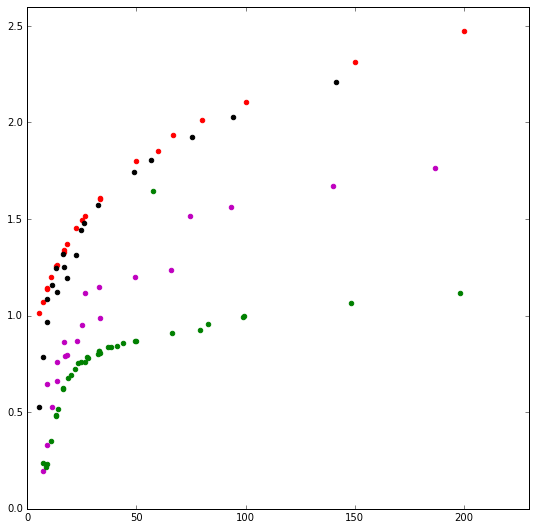

In [35]:
eh=0
plt.figure(figsize=(9,9))

for x in range(0,len(files)):

    if INFO[x][1] == 100:
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='g')
    if INFO[x][1] == 95:
        None
        #plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='b')
    if INFO[x][1] == 85:
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='m') 
    if INFO[x][1] == 35:
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='k') 
    if INFO[x][1] == 0:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')
    if INFO[x][1] == 3:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='blue')        
#plt.scatter(MagX5,MagY5,color='k',alpha = 0.3)
#plt.scatter(Mx35,My35,color='b',alpha = 0.3)
plt.legend()
plt.xlim(0,230)
plt.ylim(0,2.6)

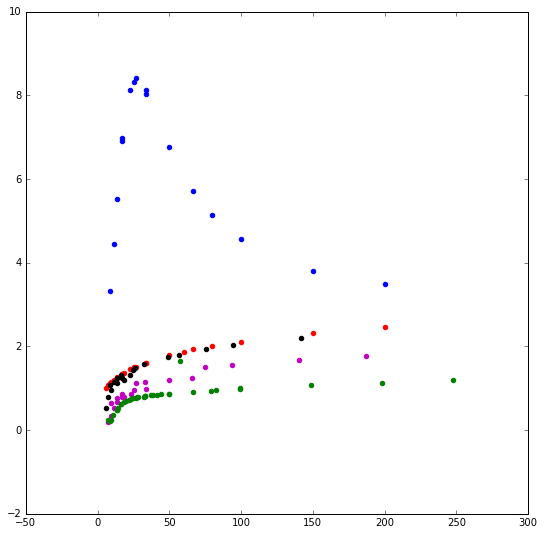

In [39]:
eh=0
plt.figure(figsize=(9,9))

for x in range(0,len(files)):
    if INFO[x][1] == 100:
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='g')
    if INFO[x][1] == 95:
        None
        #plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='b')
    if INFO[x][1] == 85:
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='m') 
    if INFO[x][1] == 35:
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='k') 
    if INFO[x][1] == 0:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')
    if INFO[x][1] == 3:
        #eh+=1
        plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='blue')         
#plt.scatter(MagX5,MagY5,color='k',alpha = 0.3)
#plt.scatter(Mx35,My35,color='b',alpha = 0.3)
#plt.xlim(0,230)
#plt.ylim(0,2.6)

['Xe-003_P-01_E-080', 3, 1.0, 80]
['Xe-003_P-01_E-100', 3, 1.0, 100]
['Xe-003_P-01_E-150', 3, 1.0, 150]
['Xe-003_P-01_E-200', 3, 1.0, 200]
['Xe-003_P-03_E-080', 3, 3.0, 80]
['Xe-003_P-03_E-100', 3, 3.0, 100]
['Xe-003_P-03_E-150', 3, 3.0, 150]
['Xe-003_P-03_E-200', 3, 3.0, 200]
['Xe-003_P-06_E-080', 3, 6.0, 80]
['Xe-003_P-06_E-100', 3, 6.0, 100]
['Xe-003_P-06_E-150', 3, 6.0, 150]
['Xe-003_P-06_E-200', 3, 6.0, 200]
['Xe-003_P-09_E-080', 3, 9.0, 80]
['Xe-003_P-09_E-100', 3, 9.0, 100]
['Xe-003_P-09_E-150', 3, 9.0, 150]
['Xe-003_P-09_E-200', 3, 9.0, 200]


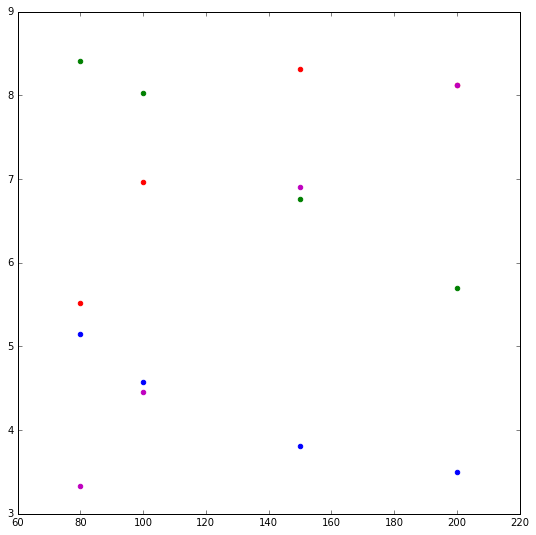

In [40]:
plt.figure(figsize=(9,9))
for x in range(0,len(files)):
    if INFO[x][1] == 3:
        print(INFO[x])
        if INFO[x][2] == 1:
            plt.scatter(INFO[x][3],Tdrift[x],color='b',label='1bar')
        if INFO[x][2] == 3:
            plt.scatter(INFO[x][3],Tdrift[x],color='g',label='3bar')
        if INFO[x][2] == 6:
            plt.scatter(INFO[x][3],Tdrift[x],color='r',label='6bar')
        if INFO[x][2] == 9:
            plt.scatter(INFO[x][3],Tdrift[x],color='m',label='9bar') 
        if INFO[x][2] == 11:
            plt.scatter(INFO[x][3],Tdrift[x],color='k',label='10bar')       
#plt.legend(loc='upper left')            
plt.show()

In [ ]:
II = [name, percent, pressure, Efield]

In [ ]:
plt.figure(figsize=(9,9))
for x in range(0,len(files)):
    if INFO[x][1] == 99:
        print(INFO[x])
        if INFO[x][2] == 1.08:
            plt.scatter(INFO[x][3],Tdrift[x],color='b',label='1bar')
        if INFO[x][2] == 3.02:
            plt.scatter(INFO[x][3],Tdrift[x],color='g',label='3bar')
        if INFO[x][2] == 6.01:
            plt.scatter(INFO[x][3],Tdrift[x],color='r',label='6bar')
        if INFO[x][2] == 9.01:
            plt.scatter(INFO[x][3],Tdrift[x],color='m',label='9bar') 
        if INFO[x][2] == 9.95:
            plt.scatter(INFO[x][3],Tdrift[x],color='k',label='10bar')       
plt.legend(loc='upper left')            
plt.show()
            ##plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')

In [ ]:
plt.figure(figsize=(9,9))
for x in range(0,len(files)):
    if INFO[x][1] == 85:
        print(INFO[x])
        if INFO[x][2] == 1.07:
            plt.scatter(INFO[x][3]/1.07,Tdrift[x],color='b',label='1bar')
        if INFO[x][2] == 3.03:
            plt.scatter(INFO[x][3]/3.03,Tdrift[x],color='g',label='3bar')
        if INFO[x][2] == 5.96:
            plt.scatter(INFO[x][3]/5.96,Tdrift[x],color='r',label='6bar')
        if INFO[x][2] == 8.69:
            plt.scatter(INFO[x][3]/8.69,Tdrift[x],color='m',label='9bar') 
        if INFO[x][2] == 10.94:
            plt.scatter(INFO[x][3]/10.94,Tdrift[x],color='k',label='10bar')       
#plt.legend(loc='upper left')            
plt.show()
            ##plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')

In [ ]:
plt.figure(figsize=(9,9))
for x in range(0,len(files)):
    if INFO[x][1] == 50:
        print(INFO[x])
        if INFO[x][2] == 1.06:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='b',label='1bar')
        if INFO[x][2] == 3.04:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='g',label='3bar')
        if INFO[x][2] == 6.0:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r',label='6bar')
        if INFO[x][2] == 8.91:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='m',label='9bar') 
        if INFO[x][2] == 11.02:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='k',label='10bar')       
#plt.legend(loc='upper left')            
plt.show()
            ##plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')

In [ ]:
plt.figure(figsize=(9,9))
for x in range(0,len(files)):
    if INFO[x][1] == 35:
        print(INFO[x])
        if INFO[x][2] == 1.06:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='b',label='1bar')
        if INFO[x][2] == 3.08:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='g',label='3bar')
        if INFO[x][2] == 6.04:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r',label='6bar')
        if INFO[x][2] == 8.97:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='m',label='9bar') 
        if INFO[x][2] == 10.96:
            plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='k',label='10bar')       
#plt.legend(loc='upper left')            
plt.show()
            ##plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')

In [ ]:
plt.figure(figsize=(9,9))
for x in range(0,len(files)):
    if INFO[x][1] == 0:
        print(INFO[x])
        if INFO[x][2] == 1:
            plt.scatter(INFO[x][3],Tdrift[x],color='b',label='1bar')
        if INFO[x][2] == 3:
            plt.scatter(INFO[x][3],Tdrift[x],color='g',label='3bar')
        if INFO[x][2] == 6:
            plt.scatter(INFO[x][3],Tdrift[x],color='r',label='6bar')
        if INFO[x][2] == 9:
            plt.scatter(INFO[x][3],Tdrift[x],color='m',label='9bar') 
        if INFO[x][2] == 11:
            plt.scatter(INFO[x][3],Tdrift[x],color='k',label='10bar')       
#plt.legend(loc='upper left')            
plt.show()
            ##plt.scatter(INFO[x][3]/INFO[x][2],Tdrift[x],color='r')

In [ ]:
eh

In [ ]:
36+27

In [ ]:
len(INFO)

In [ ]:
plt.axvline(Data[0][pp],color='r')
plt.axvline(Data[0][ee],color='g')

In [ ]:
(Data[0][pp]-Data[0][ee])/2

In [ ]:
Data = np.loadtxt(files[4])

In [ ]:
pp,ee = FIND_MAX(Data[0],Data[1])
T0 = (Data[0][pp]-Data[0][ee])/2

MM, MIN, RE = FIND_MIN(Data[0],Data[2])
T1 = (Data[0][MM]-Data[0][RE])/2

In [ ]:
T1-T0

In [ ]:
T1

In [ ]:
T0

In [ ]:
tt = '1056'
a, b = tt[:2], tt[2:]
ff = a+'.'+b
float(ff)

In [ ]:
a